In [1]:
import urllib.request, urllib.error, urllib.parse
from bs4 import BeautifulSoup

Now, individual article content needs scraping. The below listing uses `BeautifulSoup` and the `requests` library to scrape the contents of a given url, which was sourced from the sitemap. The `lxml` parser was chosen again for its speed, and since the necessary external C dependency had already been installed with the `lxml-xml` parser during the XML sitemap scraping, no additional setup was needed. 

Richardson, L. (2004–2025). Beautiful Soup Documentation. Retrieved April 27, 2025, from https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser 

In [2]:

def extract_html_from_url(url):
    """given a url, return a soup object which contains the html content of the page"""
    request = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html_content = urllib.request.urlopen(request).read().decode('utf-8')
    soup = BeautifulSoup(html_content, 'lxml')
    return soup


The contents of the HTML were analysed and parsed into a dictionary capturing the title, author, date, sector, stock codes, and the article body, as demonstrated in the below listing, utilising Beautiful Soup to extract data from the relevant tags. Below is an example output from the parsing process:
```{python}
soup_test = extract_html_from_url('https://smallcaps.com.au/galan-lithium-directors-show-confidence-share-purchase/')
parsed_dict = parse_html_to_dict(soup_test)
parsed_dict

{'title': 'Galan Lithium directors show confidence with $1.4 million share purchase',
 'author': 'Colin Hay',
 'date_string': 'May 23, 2024',
 'sector': 'Mining',
 'stock_codes': ['ASX:GLN'],
 'document': 'Galan Lithium (ASX: GLN) managing director Juan Pablo....}
```

In [3]:
def parse_html_to_dict(soup_obj):    
    """
    Parse the HTML content of a Small Caps article into a dictionary, extracting the title, author, date, sector, stock codes, and document.
    """

    # Parse the title from the <h1> element; fall back to <title> if not found.
    title_tag = soup_obj.find("h1", class_="c-post-header__title")
    if title_tag:
        title = title_tag.get_text(strip=True)
    else:
        title = soup_obj.title.get_text(strip=True) if soup_obj.title else None

    # parse the author from the header
    author_tag = soup_obj.find('a', class_='c-post-header__author-link')
    author = author_tag.get_text(strip=True) if author_tag else None

    # parse the date from the first <time> tag
    date_tag = soup_obj.find('time')
    date_string = date_tag.get_text(strip=True) if date_tag else None

    # parse the sector from the navigation
    sector = None
    nav_section = soup_obj.find("div", class_="c-post__navigation")
    if nav_section:
        sector_tag = nav_section.find("a", class_="c-post__navigation-link")
        sector = sector_tag.get_text(strip=True) if sector_tag else None

    # parse the stock codes
    stock_codes = []
    # look for any div whose class attribute contains "c-tags"
    tags_container = soup_obj.find(
        lambda tag: tag.name == "div" and tag.get("class") and any("c-tags" in c for c in tag.get("class"))
    )
    if tags_container:
        stock_text_span = tags_container.find("span", class_="c-tags__text")
        if stock_text_span and "Stock Codes" in stock_text_span.get_text():
            # Try to find an inner container if available
            inner = tags_container.find("div", class_="c-tags__inner")
            if inner:
                stock_codes = [a.get_text(strip=True) for a in inner.find_all("a", class_="c-tags__item c-tags__item--link")]
            else:
                stock_codes = [a.get_text(strip=True) for a in tags_container.find_all("a", class_="c-tags__item c-tags__item--link")]

    # parse the article body
    body_tag = soup_obj.find("div", class_="c-rich-text c-post__rich-text")
    if body_tag:
        # Use "\n" as separator to preserve paragraph breaks
        document = body_tag.get_text(separator = " ", strip=True)
    else:
        document = None

    return {
        'title': title,
        'author': author,
        'date_string': date_string,
        'sector': sector,
        'stock_codes': stock_codes,
        'document': document
    }

In [41]:
# import article_metadata.csv as a pandas dataframe
import pandas as pd
from time import sleep
import time

# Initialize an empty DataFrame to store the articles
crawl_throttle_time_s = 3 

# Read the metadata CSV file
article_metadata = pd.read_csv('../data/article_metadata.csv')
article_df = pd.read_csv('../data/article_scraped_data.csv')

# for each row in article_df, get the url from the same row index of article_metadata


In [ ]:
unscraped_articles = article_metadata.loc[article_metadata['url'].isin(article_df['url']) == False]
number_of_articles = 500
crawl_throttle_time_s = 3

for index, row in unscraped_articles.iloc[0:number_of_articles-1].iterrows(): # iterate through websites urls in article_metadata
    print(f"Article {index+1}/{number_of_articles}...")
    url = row['url']

    start_time = time.time()
    try:
        soup = extract_html_from_url(url)
        parsed = parse_html_to_dict(soup)
        parsed['url'] = url
        article_df = pd.concat([article_df, pd.DataFrame([parsed])], ignore_index=True)
        article_df.to_csv('../data/article_scraped_data.csv', index=False)
    except Exception as e: 
        print(f"Error processing {url} at index {index}: {e}")
    
    elapsed_time = time.time() - start_time
    if elapsed_time < crawl_throttle_time_s:
        sleep(crawl_throttle_time_s - elapsed_time)


Article 1509/200...
Article 1510/200...
Article 1511/200...
Article 1512/200...
Article 1513/200...
Article 1514/200...
Article 1515/200...
Article 1516/200...
Article 1517/200...
Article 1518/200...
Article 1519/200...
Article 1520/200...
Article 1521/200...
Article 1522/200...
Article 1523/200...
Article 1524/200...
Article 1525/200...
Article 1526/200...
Article 1527/200...
Article 1528/200...
Article 1529/200...
Article 1530/200...
Article 1531/200...
Article 1532/200...
Article 1533/200...
Article 1534/200...
Article 1535/200...
Article 1536/200...
Article 1537/200...
Article 1538/200...
Article 1539/200...
Article 1540/200...
Article 1541/200...
Article 1542/200...
Article 1543/200...
Article 1544/200...
Article 1545/200...
Article 1546/200...
Article 1547/200...
Article 1548/200...
Article 1549/200...
Article 1550/200...
Article 1551/200...
Article 1552/200...
Article 1553/200...
Article 1554/200...
Article 1555/200...
Article 1556/200...
Article 1557/200...
Article 1558/200...


In [44]:
article_df

,title,author,date_string,sector,stock_codes,document,url
0,Surprise Budget will show longer term deficits,John Beveridge,"March 23, 2025",Hot Topics,[],This week’s Federal Budget should be the econo...,https://smallcaps.com.au/surprise-budget-will-...
1,Weekly wrap: supermarket stocks boost market’s...,John Beveridge,"March 22, 2025",Hot Topics,[],It’s official – supermarket prices are rising ...,https://smallcaps.com.au/weekly-wrap-supermark...
2,DRC suspension of exports expected to result i...,Colin Hay,"March 21, 2025",Hot Topics,[],Reports that the Democratic Republic of the Co...,https://smallcaps.com.au/drc-suspension-export...
3,GreenHy2 secures H2Core deal to advance superc...,Colin Hay,"March 21, 2025",Energy,['ASX:H2G'],Solid state hydrogen storage developer GreenHy...,https://smallcaps.com.au/greenhy2-h2core-deal-...
4,Compumedics reaches $20m in Chinese MEG sales ...,Colin Hay,"March 21, 2025",Biotech,['ASX:CMP'],Brain research technologies specialist Compume...,https://smallcaps.com.au/compumedics-chinese-m...
...,...,...,...,...,...,...,...
1702,Nova Minerals targets NASDAQ dual listing to i...,Colin Hay,"February 29, 2024",Mining,[ASX:NVA],Nova Minerals (ASX: NVA) has confirmed its pro...,https://smallcaps.com.au/nova-minerals-targets...
1703,Radiopharm Theranostics doses first patient in...,Imelda Cotton,"February 29, 2024",Biotech,[ASX:RAD],Biotechnology company Radiopharm Theranostics ...,https://smallcaps.com.au/radiopharm-theranosti...
1704,Boss Energy on track to produce first drum of ...,Imelda Cotton,"February 29, 2024",Mining,[ASX:BOE],Boss Energy (ASX: BOE) has started commissioni...,https://smallcaps.com.au/boss-energy-on-track-...
1705,VHM accelerates transition from explorer to de...,Colin Hay,"February 29, 2024",Mining,[ASX:VHM],VHM Limited (ASX: VHM) continues to achieve it...,https://smallcaps.com.au/vhm-accelerates-trans...


In [49]:
article_df
df = article_df
df = df.dropna(subset=['document']).reset_index(drop=True)
df = df.loc[df['sector'] != 'Hot Topics']
df

,title,author,date_string,sector,stock_codes,document,url
3,GreenHy2 secures H2Core deal to advance superc...,Colin Hay,"March 21, 2025",Energy,['ASX:H2G'],Solid state hydrogen storage developer GreenHy...,https://smallcaps.com.au/greenhy2-h2core-deal-...
4,Compumedics reaches $20m in Chinese MEG sales ...,Colin Hay,"March 21, 2025",Biotech,['ASX:CMP'],Brain research technologies specialist Compume...,https://smallcaps.com.au/compumedics-chinese-m...
5,CZR Resources receives $75m offer for Robe Mes...,Colin Hay,"March 21, 2025",Mining,['ASX:CZR'],CZR Resources (ASX: CZR) has received a condit...,https://smallcaps.com.au/czr-resources-offer-r...
7,Arafura signs five-year offtake deal with Trax...,Colin Hay,"March 20, 2025",Mining,['ASX:ARU'],Arafura Rare Earths (ASX: ARU) has signed a bi...,https://smallcaps.com.au/arafura-five-year-off...
8,International Graphite confirms strong economi...,Colin Hay,"March 20, 2025",Mining,['ASX:IG6'],International Graphite (ASX: IG6) has received...,https://smallcaps.com.au/international-graphit...
...,...,...,...,...,...,...,...
1693,Adriatic Metals produces first concentrate at ...,Colin Hay,"February 29, 2024",Mining,[ASX:ADT],Adriatic Metals (ASX: ADT) has overcome a deli...,https://smallcaps.com.au/adriatic-metals-produ...
1694,Nova Minerals targets NASDAQ dual listing to i...,Colin Hay,"February 29, 2024",Mining,[ASX:NVA],Nova Minerals (ASX: NVA) has confirmed its pro...,https://smallcaps.com.au/nova-minerals-targets...
1695,Radiopharm Theranostics doses first patient in...,Imelda Cotton,"February 29, 2024",Biotech,[ASX:RAD],Biotechnology company Radiopharm Theranostics ...,https://smallcaps.com.au/radiopharm-theranosti...
1696,Boss Energy on track to produce first drum of ...,Imelda Cotton,"February 29, 2024",Mining,[ASX:BOE],Boss Energy (ASX: BOE) has started commissioni...,https://smallcaps.com.au/boss-energy-on-track-...


# Article EDA

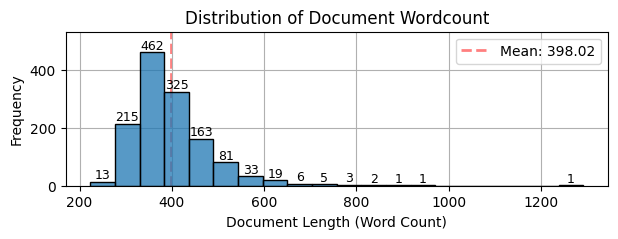

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate document lengths
df['document_length'] = df['document'].apply(lambda x: len(x.split()))
# Plot histogram with KDE
plt.figure(figsize=(7, 2))
sns.histplot(df['document_length'], bins=20, stat="count", zorder=2)

# Add labels to each bar
for patch in plt.gca().patches:
    height = patch.get_height()
    if height > 0:  # Only label bars with a height greater than 0
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Add vertical mean line
mean_length = df['document_length'].mean()
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}', zorder=0, alpha=0.5)
# multiply the y scale by 1.1 to make room for the mean line label
plt.ylim(0, plt.gca().get_ylim()[1] * 1.1)
# Customize plot
plt.title('Distribution of Document Wordcount')
plt.xlabel('Document Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, zorder=0)
plt.show()


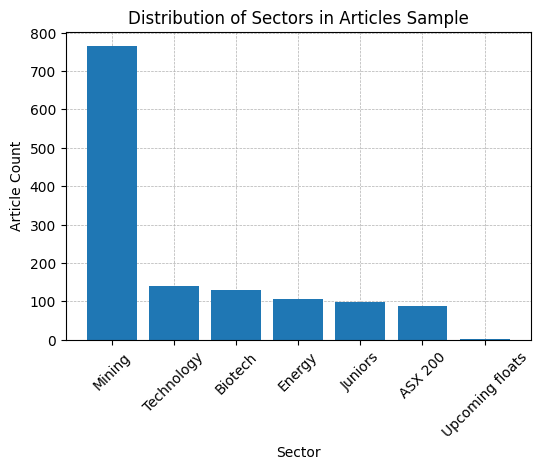

In [51]:
# make a barplot of the distribution of sectors
plt.figure(figsize=(6, 4))
sector_counts = df['sector'].value_counts()
plt.bar(sector_counts.index, sector_counts.values, zorder=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
plt.title('Distribution of Sectors in Articles Sample')
plt.xlabel('Sector')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\hkrug\AppData\Local\Temp\ipykernel_12428\3763524142.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=stock_code_counts.index, y=stock_code_counts.values, palette=[sector_color_map[sector] for sector in stock_code_sectors], zorder=2)


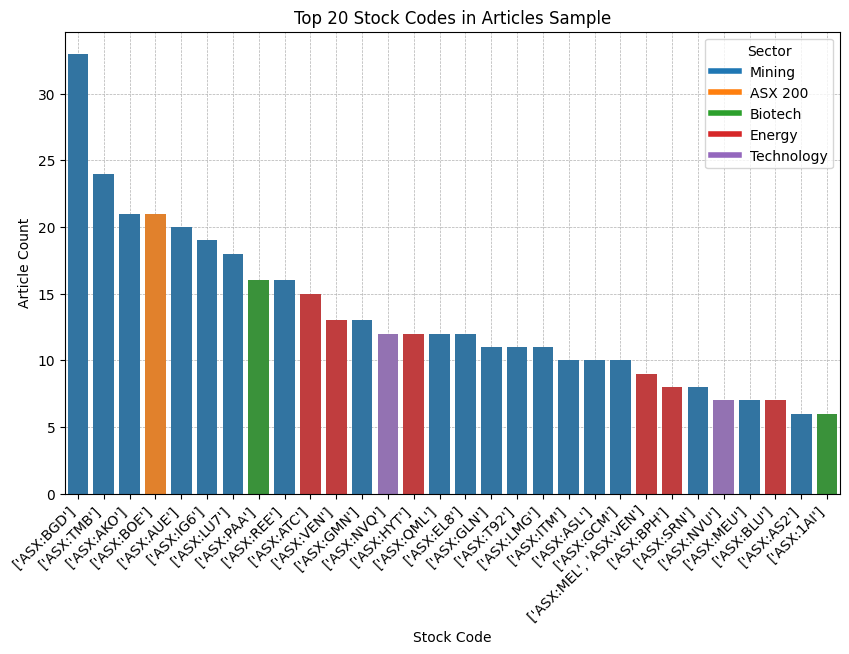

In [48]:
# Flatten the list of stock codes
stock_codes = df['stock_codes'].explode()
# Count the occurrences of each stock code
stock_code_counts = stock_codes.value_counts().head(30)

# Create a mapping of stock codes to sectors
stock_to_sector = df[['stock_codes', 'sector']].dropna().explode('stock_codes').drop_duplicates(subset=['stock_codes']).set_index('stock_codes')['sector']

# Map the stock codes to their respective sectors
stock_code_sectors = stock_code_counts.index.map(stock_to_sector)

# Create a color palette for the sectors
unique_sectors = stock_code_sectors.unique()
colors = sns.color_palette('tab10', len(unique_sectors))
sector_color_map = dict(zip(unique_sectors, colors))

# Plot the distribution
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=stock_code_counts.index, y=stock_code_counts.values, palette=[sector_color_map[sector] for sector in stock_code_sectors], zorder=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
plt.title('Top 20 Stock Codes in Articles Sample')
plt.xlabel('Stock Code')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')

# Create a legend
handles = [plt.Line2D([0], [0], color=sector_color_map[sector], lw=4) for sector in unique_sectors]
plt.legend(handles, unique_sectors, title='Sector', loc='best')

plt.show()


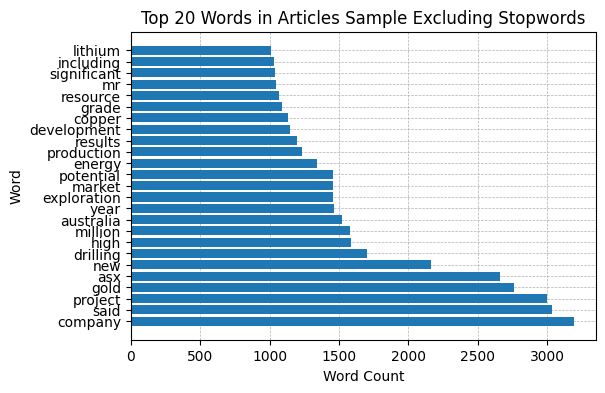

In [ ]:
# make a barplot of the top 20 words in the document excluding stopwords, using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.pipeline import make_pipeline

# tokenize the document excluding stopwords
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['document'])
words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)
word_counts_df = pd.DataFrame({'word': words, 'count': word_counts})
top_words_df = word_counts_df.nlargest(25, 'count')

# plot the top 20 words
plt.figure(figsize=(6, 4))
plt.barh(top_words_df['word'], top_words_df['count'], zorder=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
plt.title('Top 20 Words in Articles Sample Excluding Stopwords')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()


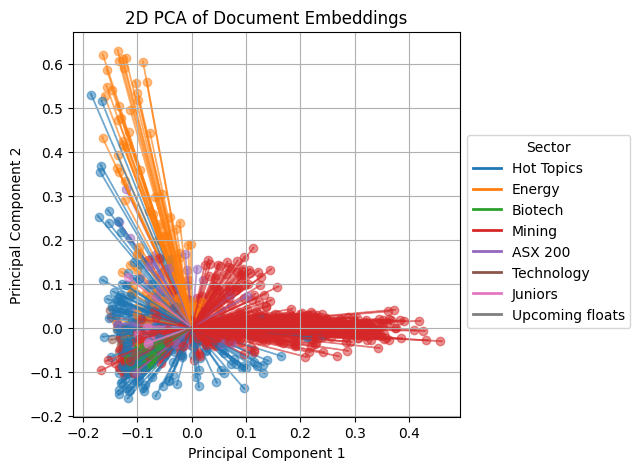

In [ ]:
# make a 2d biplot of the documents using principal component analysis
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tokenized_documents = vectorizer.fit_transform(df['document'])
principle_components = PCA(n_components=2).fit_transform(tokenized_documents.toarray())  # Fit the PCA to the TF-IDF matrix
pca_df = pd.DataFrame(principle_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(5, 5))

sectors = df['sector'].unique()
colors = sns.color_palette('tab10', len(sectors))
sector_color_map = dict(zip(sectors, colors))

for i in range(len(pca_df)):
    sector = df['sector'][i]
    color = sector_color_map.get(sector, 'black')  # Use 'black' as default color if sector is not found
    plt.arrow(0, 0, pca_df['PC1'][i], pca_df['PC2'][i], color=color, alpha=0.5)
    plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color=color, alpha=0.5)

handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors]
labels = sectors
plt.legend(handles, labels, title='Sector', loc='upper left', bbox_to_anchor=(1, 0.75))
plt.title('2D PCA of Document Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
